In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [5]:
X = X[y<2, :2]
y = y[y < 2]

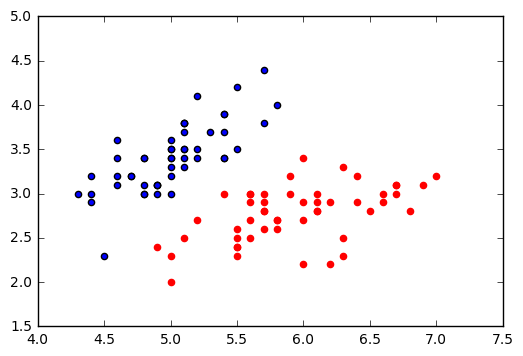

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'r')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
standarscler = StandardScaler()
standarscler.fit(X)
X_standard = standarscler.transform(X)

In [9]:
from sklearn.svm import LinearSVC

In [10]:
svc = LinearSVC(C = 1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
import numpy as np
def plot_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth = 5, cmap = custom_cmap)

E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


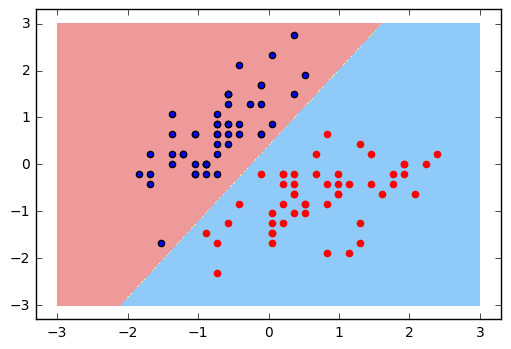

In [12]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1], color = 'r')
plt.show()

In [13]:
svc2 = LinearSVC(C = 0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


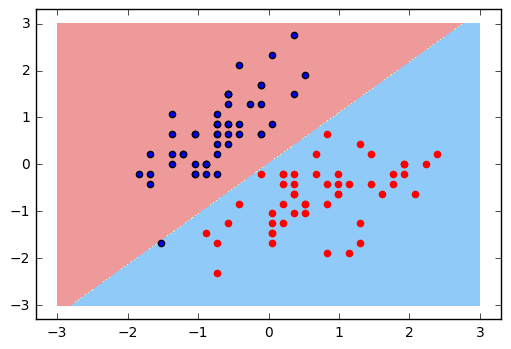

In [14]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1], color = 'r')
plt.show()

#### 把C调小了就会犯错了，有更大的容错空间

In [15]:
svc.coef_

array([[ 4.03240694, -2.49293333]])

In [16]:
svc.intercept_

array([0.95363603])

In [26]:
import numpy as np
def plot_svc_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth = 5, cmap = custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * x0 + w1 * x1 + b = 0 对于上面的例子，其实就是训练出来这个直线
    # x1 = - (w0 * x0) / w1 - b/w1
    w0 = w[0]
    w1 = w[1]
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = - (w0 * plot_x) / w1 - b/w1 + 1/w1
    down_y = - (w0 * plot_x) / w1 - b/w1 - 1/w1
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color = 'black')
    plt.plot(plot_x[down_index], down_y[down_index], color = 'b')
    

E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


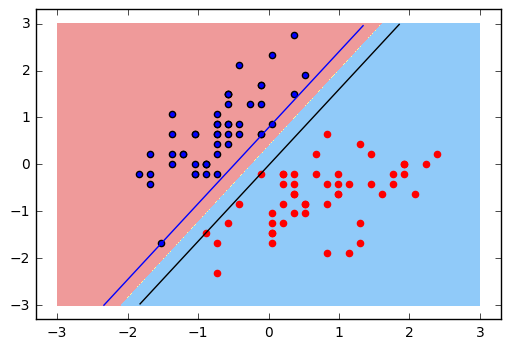

In [27]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1], color = 'r')
plt.show()

E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


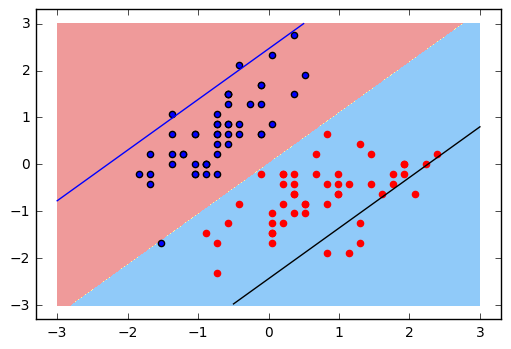

In [28]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1], color = 'r')
plt.show()